<img src='logo.png'><br>
ref : https://www.kaggle.com/vijayuv/onlineretail

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------- 군집 --------------
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
    
# -------------- 분류 --------------
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, f1_score, precision_score , recall_score,  confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 주피터 셀 넓이 조절 ---------------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

sns.set()

# 데이터 로드

In [2]:
data = pd.read_csv("online_retail.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 공통함수

In [4]:
def my_scatter(X, cluster_list=[2,3,4,5]):
    n_cols = len(cluster_list)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    for idx, n_cluster in enumerate(cluster_list):
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        pca_df = pd.DataFrame(X_pca, columns=['pc1','pc2'])
    
        model = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = model.fit_predict(pca_df)
        pca_df['cluster_label']=cluster_labels

        sil_score = silhouette_score(X, cluster_labels)
        
        unique_labels = pca_df['cluster_label'].unique()
        markers=['o', 's', '^', 'x', '*']

        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = pca_df[pca_df['cluster_label']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :         
                axs[idx].scatter(x=label_df['pc1'], y=label_df['pc2'],  label=str(label))  #edgecolor='k', marker=markers[label],

            axs[idx].set_title(f'Cluster num:{n_cluster},\n sil_socre: {sil_score:.4f}')    
            axs[idx].legend()


# 결측제거한 데이터

In [5]:
print(data.shape)
data['CustomerID'].isna().sum()

(541909, 8)


135080

In [6]:
data[data['Quantity']<=0].index

Int64Index([   141,    154,    235,    236,    237,    238,    239,    240,
               241,    939,
            ...
            540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715,
            541716, 541717],
           dtype='int64', length=10624)

In [7]:
data[data['UnitPrice']<=0].index

Int64Index([   622,   1970,   1971,   1972,   1987,   1988,   2024,   2025,
              2026,   2406,
            ...
            535333, 535334, 535335, 535336, 536908, 536981, 538504, 538505,
            538554, 538919],
           dtype='int64', length=2517)

In [8]:
null_idx = data[(data['CustomerID'].isna()) | (data['Quantity']<=0) | (data['UnitPrice']<=0) ].index.values
null_idx[:5]

array([141, 154, 235, 236, 237], dtype=int64)

In [9]:
df = data.drop(null_idx, axis=0)

In [10]:
print(df.shape)
df.info()

(397884, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [11]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

<AxesSubplot:>

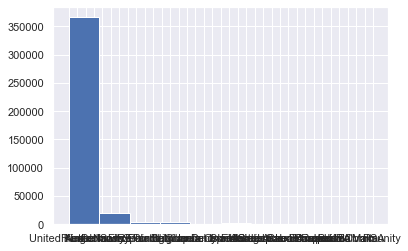

In [13]:
print(df['Country'].value_counts())
df['Country'].hist()

In [17]:
df = df[df['Country']=='United Kingdom'].copy()

# RFM 기반 데이터 가공
* Recency :   InvoiceDate.max() 
* Frequency : InvoiceNo.count()
* Monetary : (Quantity*UnitPrice).sum()

## Recency 

In [18]:
df.InvoiceDate.max(),  df.InvoiceDate.min()

(Timestamp('2011-12-09 12:49:00'), Timestamp('2010-12-01 08:26:00'))

In [19]:
import datetime as dt

df['rday'] = dt.datetime(2011,12,10) - df['InvoiceDate']
df['rday2'] = df['rday'].apply(lambda x: x.days+1)
print(df.shape)
df.head(3)

(354321, 10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,rday,rday2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,373 days 15:34:00,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,373 days 15:34:00,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,373 days 15:34:00,374


In [20]:
df.drop(['InvoiceDate', 'rday'], axis=1, inplace=True)

In [21]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,rday2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,374
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,374


## Frequency

In [22]:
df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count()[:5]

InvoiceNo  StockCode
536365     21730        1
           22752        1
           71053        1
           84029E       1
           84029G       1
Name: InvoiceNo, dtype: int64

## Momentory
* Quantity * UnitPrice

In [23]:
df['PC_M'] = df['Quantity'] * df['UnitPrice']

## RFM DataFrame

In [24]:
df = df.groupby('CustomerID').agg({'rday2': 'max', 'InvoiceNo': 'count', 'PC_M':'sum'})
df = df.rename(columns = {'rday2':'PC_R', 'InvoiceNo':'PC_F', 'PC_M':'PC_M'})
df = df.reset_index()

In [25]:
print(df.shape)
df.head(3)

(3920, 4)


,CustomerID,PC_R,PC_F,PC_M
0,12346,326,1,77183.60
1,12747,370,103,4196.01
2,12748,374,4595,33719.73


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3920 non-null   int64  
 1   PC_R        3920 non-null   int64  
 2   PC_F        3920 non-null   int64  
 3   PC_M        3920 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 122.6 KB


array([[<AxesSubplot:title={'center':'PC_R'}>,
        <AxesSubplot:title={'center':'PC_F'}>],
       [<AxesSubplot:title={'center':'PC_M'}>, <AxesSubplot:>]],
      dtype=object)

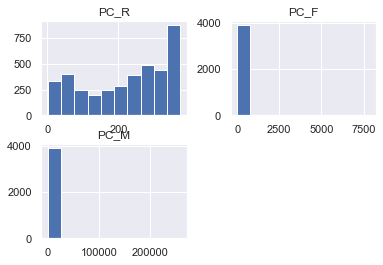

In [27]:
df[['PC_R','PC_F','PC_M']].hist()

In [28]:
df.describe()

,CustomerID,PC_R,PC_F,PC_M
count,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,224.085714,90.388010,1864.385601
std,1576.594671,118.037855,217.808385,7482.817477
min,12346.000000,2.000000,1.000000,3.750000
25%,14208.750000,113.000000,17.000000,300.280000
50%,15569.500000,250.000000,41.000000,652.280000
75%,16913.250000,328.000000,99.250000,1576.585000
max,18287.000000,374.000000,7847.000000,259657.300000


# KMeans 군집화

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X = df[['PC_R','PC_F','PC_M']]

model = KMeans(n_clusters=3, random_state=0)
model.fit(X)
pred = model.predict(X)
df['cluster_label'] = pred

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X, pred)))

실루엣 스코어는 : 0.957


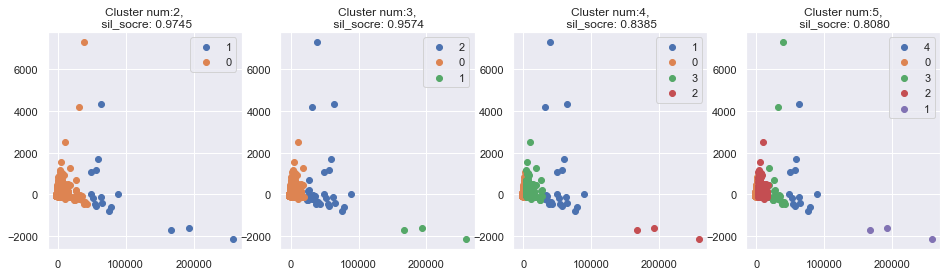

In [30]:
my_scatter(X, cluster_list=[2,3,4,5])

# 스케일링

In [31]:
X_scale = StandardScaler().fit_transform(X)
model = KMeans(n_clusters=3, random_state=0)
model.fit(X_scale)
pred = model.predict(X_scale)
df['cluster_label'] = pred

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_scale, pred)))

실루엣 스코어는 : 0.530


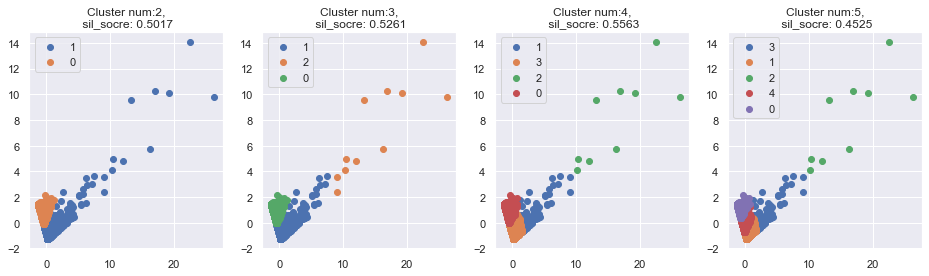

In [32]:
my_scatter(X_scale, cluster_list=[2,3,4,5])

# 로그 스케일링

In [33]:
df['PC_R_log'] = np.log1p(df['PC_R'])
df['PC_F_log'] = np.log1p(df['PC_F'])
df['PC_M_log'] = np.log1p(df['PC_M'])

X_log = df[['PC_R_log','PC_F_log','PC_M_log']]
X_log_scale = StandardScaler().fit_transform(X_log)
model = KMeans(n_clusters=3, random_state=0)
model.fit(X_log_scale)
pred = model.predict(X_log_scale)
df['cluster_label'] = pred

print('실루엣 스코어 : {0:.3f}'.format(silhouette_score(X_log_scale, pred)))

실루엣 스코어 : 0.391


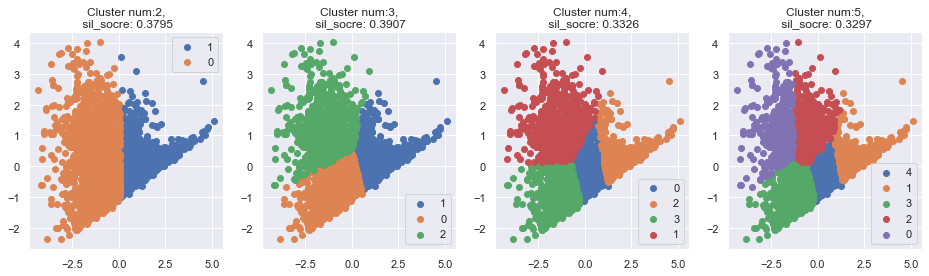

In [34]:
my_scatter(X_log_scale, cluster_list=[2,3,4,5])

## RFM 개별 군집화

In [53]:
log_df = pd.DataFrame(X_log_scale, columns=['R','F','M'])
log_df['CustomerID'] = df['CustomerID']
log_df.head()

,R,F,M,CustomerID
0,0.722131,-2.403387,3.785914,12346
1,0.866842,0.732578,1.444280,12747
2,0.879135,3.739419,3.119983,12748
3,0.241462,1.251577,1.423880,12749
4,0.725631,0.296025,0.243880,12820


array([[<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'F'}>],
       [<AxesSubplot:title={'center':'M'}>,
        <AxesSubplot:title={'center':'CustomerID'}>]], dtype=object)

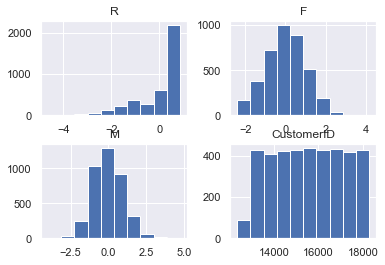

In [58]:
log_df.hist()

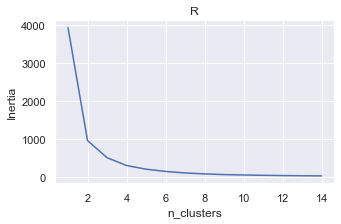

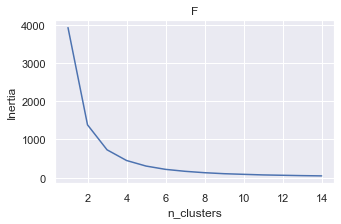

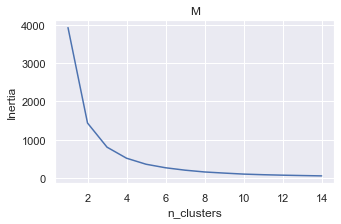

In [82]:
for col in ['R','F','M']:
    inertia_list = []
    for k in range(1, 15):
        dmodel = KMeans(n_clusters=k)
        cluster_label = dmodel.fit_predict(np.array(log_df[col]).reshape(-1, 1))
        inertia_list.append(dmodel.inertia_)

    plt.figure(figsize=(5, 3))
    plt.plot(range(1, 15), inertia_list)
    plt.ylabel("Inertia")
    plt.xlabel("n_clusters")
    plt.title(col)

In [85]:
for col in ['R','F','M']:
    inertia_list = []
    dmodel = KMeans(n_clusters=4)
    cluster_label = dmodel.fit_predict(np.array(log_df[col]).reshape(-1, 1))
    log_df["cluser_label"+col] = cluster_label
    inertia_list.append(dmodel.inertia_)

In [86]:
log_df.head()

,R,F,M,CustomerID,cluser_labelR,cluser_labelF,cluser_labelM,RFM
0,0.722131,-2.403387,3.785914,12346,0,0,0,11
1,0.866842,0.732578,1.444280,12747,0,1,0,10
2,0.879135,3.739419,3.119983,12748,0,2,0,24
3,0.241462,1.251577,1.423880,12749,2,2,0,17
4,0.725631,0.296025,0.243880,12820,0,1,3,11


In [87]:
log_df['RFM'] = log_df['cluser_labelR'] + log_df['cluser_labelF'] + log_df['cluser_labelM']
log_df.head()

,R,F,M,CustomerID,cluser_labelR,cluser_labelF,cluser_labelM,RFM
0,0.722131,-2.403387,3.785914,12346,0,0,0,0
1,0.866842,0.732578,1.444280,12747,0,1,0,1
2,0.879135,3.739419,3.119983,12748,0,2,0,2
3,0.241462,1.251577,1.423880,12749,2,2,0,4
4,0.725631,0.296025,0.243880,12820,0,1,3,4


In [88]:
log_df['RFM'].unique()

array([0, 1, 2, 4, 5, 3, 6, 7, 8, 9])

count    3920.000000
mean        4.153316
std         1.660128
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         9.000000
Name: RFM, dtype: float64


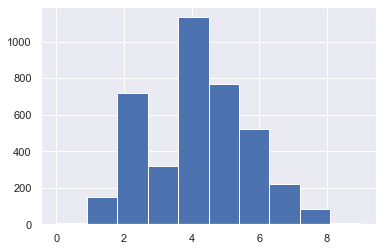

In [100]:
log_df['RFM'].hist()
print(log_df['RFM'].describe())